In [1]:
import math
import numpy as np
import os
import pandas as pd

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA

In [2]:
def get_lines_from_file(filename):
    f=open(filename)
    lines=[x.strip() for x in f]
    f.close()
    return lines

In [3]:
rgbWords  = ['yellow','blue','purple', 'orange','red','green']
shapeWords  = ['cylinder','cube', 'triangle','triangular','rectangular']
objWords = ['cylinder', 'apple','carrot', 'lime','lemon','orange', 'banana','cube', 'triangle', 'corn','cucumber', 'half', 'cabbage', 'ear', 'tomato', 'potato', 'cob','eggplant']

In [4]:
def get_deviations(filename,words):
    lines=get_lines_from_file("/Users/adithyabandi/_True_True_90_25_rgb_0_min_max.txt")
    tokens=[]
    mins=[]
    maxs=[]
    reqmins=[]
    reqmaxs=[]
    for line in lines:
        temp=line.split("_")
        tokens.append(temp[1])
        mins.append(temp[3])
        maxs.append(temp[5])
    for i in range(len(tokens)):
        if tokens[i] in words:
            reqmins.append(mins[i])
            reqmaxs.append(maxs[i])
    return reqmins,reqmaxs    

In [5]:
def get_report(filename):
    lines=get_lines_from_file(filename)
    j=0
    types=[]
    estops=[]
    sorts=[]
    pre_thres=[]
    rec_thres=[]
    split=[]
    acc=[]
    pre=[]
    rec=[]
    f1=[]
    min_means=[]
    min_medians=[]
    min_std_devs=[]
    max_means=[]
    max_medians=[]
    max_std_devs=[]
    i=0
    while i<len(lines):
        mins_agg=[]
        maxs_agg=[]
        for counter in range(4):
            if(lines[i]=="done"):
                i+=1
                break
            mins_str=lines[i].split("]")[0].split("[")[1].split(",")
            mins=[float(per_min) for per_min in mins_str]
            for mini in mins:
                mins_agg.append(mini)
            i+=1
            maxs_str=lines[i].split("]")[0].split("[")[1].split(",")
            maxs=[float(per_max) for per_max in maxs_str]
            for maxi in maxs:
                maxs_agg.append(maxi)
            i+=1
            g=lines[i]
            #print(lines[i])
            temp=g.split("-")
            sorts.append(temp[0])
            types.append(temp[1])
            estops.append(temp[2])
            pre_thres.append(temp[3])
            rec_thres.append(temp[4])
            split.append(temp[5])
            i+=2
            acc.append(float(lines[i])*100)
            i+=1
            f1.append(float(lines[i])*100)
            i+=1
            pre.append(float(lines[i])*100)
            i+=1
            rec.append(float(lines[i])*100)
            i+=2
            j+=1
        for counter in range(4):
            min_means.append(np.mean(mins_agg))
            min_medians.append(np.median(mins_agg))
            min_std_devs.append(np.std(mins_agg))
            max_means.append(np.mean(maxs_agg))
            max_medians.append(np.median(maxs_agg))
            max_std_devs.append(np.std(maxs_agg))
        
    Results=pd.DataFrame({'type':types,'early_stop':estops,
                      'pre_threshold':pre_thres,
                       'rec_threshold':rec_thres,'instances_sorted':sorts,
                          'precision':pre,'recall':rec,
                        'f1_score':f1,
                       'split':split,'accuracy':acc,#})
                       "mean_min_dissim_":min_means,"median_min_dissim_":min_medians,
                        "std_dev_min_dissim_":min_std_devs,
                        "mean_max_dissim_":max_means,
                        "median_max_dissim_":max_medians,
                        "std_dev_max_dissim_":max_std_devs})
    return Results

In [6]:
Results=get_report("/Users/adithyabandi/TM41_AllExecutionI.csv")
#Results

In [7]:
Results=Results[['instances_sorted','early_stop','type','split','pre_threshold', 'rec_threshold', 
                'f1_score','precision','recall','accuracy','mean_max_dissim_', 'mean_min_dissim_', 
                'median_max_dissim_','median_min_dissim_','std_dev_max_dissim_', 'std_dev_min_dissim_']]

In [8]:
#Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().sort_values(by=["f1_score"],ascending=False)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
def display_results(Results,feature_type,early_stop,instance_sort):
    object_Results=Results[Results.type==feature_type]
    object_Results=object_Results[object_Results.early_stop==early_stop]
    object_Results=object_Results[object_Results.instances_sorted==instance_sort]
    object_Results_grouped=object_Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold'])
    display(pd.DataFrame(object_Results_grouped.mean().reset_index()).sort_values(by=["f1_score"],ascending=False))
    object_Results_grouped_df=object_Results_grouped.aggregate(np.mean)
    object_Results_grouped_df=object_Results_grouped_df.reset_index()
    data_pivoted = object_Results_grouped_df[(object_Results_grouped_df.early_stop==early_stop) & (object_Results_grouped_df.instances_sorted==instance_sort)].pivot("pre_threshold", "rec_threshold", "f1_score")
    ax = sns.heatmap(data_pivoted)
    plt.show()

With instances sorted as True
With Early Stop set as True
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
2,True,True,rgb,25,75,93.595238,94.131944,95.486111,94.361111,88.813348,19.646770,88.854008,10.181733,0.530448,22.366621
1,True,True,rgb,25,50,93.420635,92.798611,96.597222,93.618056,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
4,True,True,rgb,50,25,92.857143,92.708333,95.833333,93.784722,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
0,True,True,rgb,25,25,92.801587,91.736111,96.666667,94.277778,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
5,True,True,rgb,50,50,91.808532,91.513889,94.583333,93.041667,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
8,True,True,rgb,75,25,91.671627,90.826389,96.180556,91.736111,88.813348,32.529929,88.854008,18.730516,0.530448,32.424001
10,True,True,rgb,75,75,90.853175,89.902778,95.486111,91.020833,88.813348,32.529929,88.854008,18.730516,0.530448,32.424001
6,True,True,rgb,50,75,90.543651,90.000000,94.652778,91.458333,88.813348,19.646770,88.854008,10.181733,0.530448,22.366621
14,True,True,rgb,90,75,89.838294,87.729167,96.736111,88.743056,88.813348,51.162183,88.854008,55.139367,0.530448,34.010265
9,True,True,rgb,75,50,87.967262,86.368056,93.402778,89.597222,88.813348,32.529929,88.854008,18.730516,0.530448,32.424001


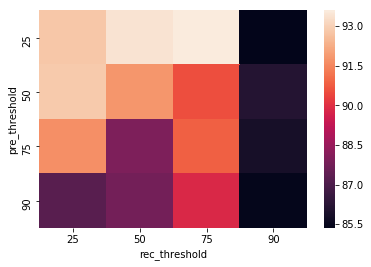

With instances sorted as True
With Early Stop set as False
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
2,True,False,rgb,25,75,94.611111,94.409722,96.805556,95.187500,88.813348,14.895397,88.854008,8.068686,0.530448,17.534545
4,True,False,rgb,50,25,93.940476,93.638889,96.597222,95.166667,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
6,True,False,rgb,50,75,93.239087,92.270833,96.736111,94.611111,88.813348,14.895397,88.854008,8.068686,0.530448,17.534545
7,True,False,rgb,50,90,93.002976,93.319444,95.208333,93.388889,88.813348,24.481011,88.854008,11.709436,0.530448,27.253525
5,True,False,rgb,50,50,91.396825,90.812500,95.416667,92.826389,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
1,True,False,rgb,25,50,91.273810,90.270833,96.111111,92.354167,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
8,True,False,rgb,75,25,91.063492,93.125000,92.152778,92.729167,88.813348,17.585612,88.854008,10.181733,0.530448,19.578309
11,True,False,rgb,75,90,91.008929,90.423611,95.069444,92.888889,88.813348,24.481011,88.854008,11.709436,0.530448,27.253525
0,True,False,rgb,25,25,90.230159,89.208333,95.486111,91.305556,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
3,True,False,rgb,25,90,89.479167,86.604167,96.736111,90.381944,88.813348,24.481011,88.854008,11.709436,0.530448,27.253525


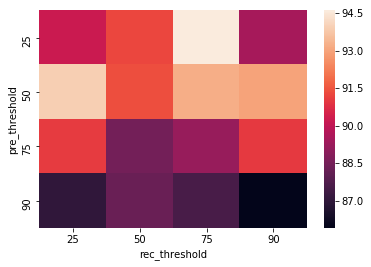

With instances sorted as False
With Early Stop set as True
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
4,False,True,rgb,50,25,94.180556,93.916667,97.222222,94.597222,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
0,False,True,rgb,25,25,93.904762,94.062500,96.388889,94.319444,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
1,False,True,rgb,25,50,93.279762,94.131944,94.861111,94.638889,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
2,False,True,rgb,25,75,93.236111,92.944444,97.152778,92.215278,87.356784,15.089005,88.854008,10.181733,5.104682,17.454896
5,False,True,rgb,50,50,92.565476,91.701389,96.041667,93.652778,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
10,False,True,rgb,75,75,91.806548,91.062500,96.388889,92.083333,88.722595,22.536663,88.854008,11.620564,0.576697,24.094655
9,False,True,rgb,75,50,91.465278,89.520833,97.222222,92.215278,88.770367,14.645864,88.854008,6.920791,0.525911,17.611289
6,False,True,rgb,50,75,90.429563,89.180556,95.208333,91.375000,87.276899,14.814595,88.854008,6.492107,7.319259,18.229585
8,False,True,rgb,75,25,90.155754,89.347222,94.861111,91.770833,88.371030,21.149506,88.854008,10.181733,2.086598,25.574922
3,False,True,rgb,25,90,89.281746,85.861111,98.055556,89.118056,81.019433,26.856311,88.825354,17.752701,19.431628,25.335735


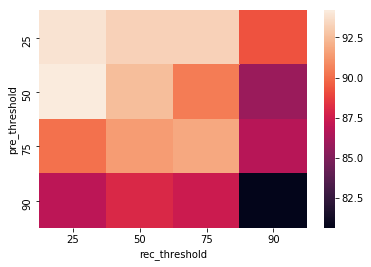

With instances sorted as False
With Early Stop set as False
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,False,False,rgb,25,25,95.405754,95.770833,96.875000,95.895833,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
7,False,False,rgb,50,90,93.572421,92.541667,97.291667,94.263889,88.384344,21.682265,88.854008,8.068686,2.305893,24.974893
6,False,False,rgb,50,75,93.533730,93.819444,96.111111,94.090278,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
2,False,False,rgb,25,75,93.372024,92.770833,96.527778,94.000000,88.813348,14.558045,88.854008,6.920791,0.530448,17.660705
1,False,False,rgb,25,50,92.998016,92.201389,96.597222,94.645833,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
5,False,False,rgb,50,50,92.810516,92.618056,96.180556,93.333333,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
8,False,False,rgb,75,25,92.361111,91.993056,95.277778,94.270833,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
9,False,False,rgb,75,50,92.174603,90.187500,97.500000,92.451389,88.794244,14.522322,88.854008,6.492107,0.538893,17.674575
4,False,False,rgb,50,25,91.780754,90.527778,96.250000,92.916667,88.813348,14.522322,88.854008,6.492107,0.530448,17.674575
10,False,False,rgb,75,75,89.553571,87.444444,96.666667,89.569444,88.799020,17.234372,88.854008,10.181733,0.536858,17.864048


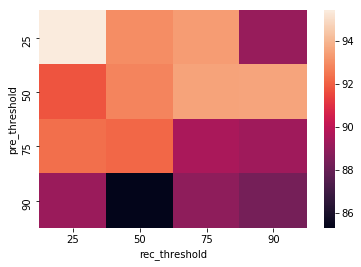

With instances sorted as True
With Early Stop set as True
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
8,True,True,shape,75,25,77.675000,84.633333,76.000000,82.133333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
10,True,True,shape,75,75,76.835714,84.833333,74.916667,84.725000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
1,True,True,shape,25,50,76.361905,82.041667,75.916667,81.458333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
4,True,True,shape,50,25,76.250000,85.750000,74.166667,82.425000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
9,True,True,shape,75,50,76.235714,84.958333,73.166667,82.766667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
3,True,True,shape,25,90,76.011905,84.541667,73.333333,82.641667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
14,True,True,shape,90,75,75.950000,82.916667,75.083333,83.633333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
6,True,True,shape,50,75,75.873810,85.500000,72.666667,82.658333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
0,True,True,shape,25,25,75.750000,83.166667,74.833333,81.700000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
5,True,True,shape,50,50,75.283333,82.250000,73.333333,82.750000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326


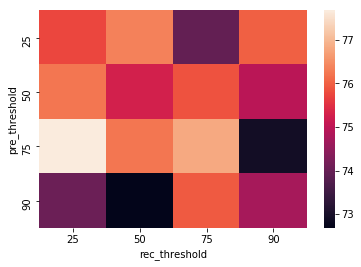

With instances sorted as True
With Early Stop set as False
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
9,True,False,shape,75,50,77.302381,83.541667,76.583333,83.875000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
0,True,False,shape,25,25,76.811905,85.875000,74.333333,84.000000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
7,True,False,shape,50,90,76.661905,85.875000,74.000000,84.150000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
8,True,False,shape,75,25,76.333333,83.083333,74.916667,84.016667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
3,True,False,shape,25,90,75.757143,83.333333,74.333333,83.383333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
10,True,False,shape,75,75,75.707143,83.583333,73.750000,83.116667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
1,True,False,shape,25,50,75.061905,81.041667,73.916667,83.783333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
12,True,False,shape,90,25,74.790476,81.083333,73.833333,80.933333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
11,True,False,shape,75,90,74.655952,83.675000,71.750000,82.516667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
6,True,False,shape,50,75,74.261905,82.208333,71.833333,80.625000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326


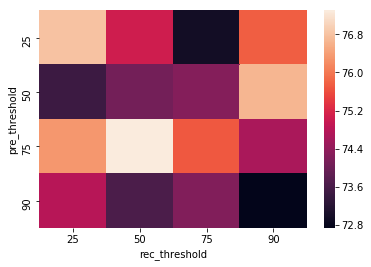

With instances sorted as False
With Early Stop set as True
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
8,False,True,shape,75,25,81.150000,87.666667,79.250000,87.683333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
12,False,True,shape,90,25,78.457143,86.333333,76.250000,85.433333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
2,False,True,shape,25,75,77.845238,85.041667,75.166667,83.325000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
10,False,True,shape,75,75,77.845238,87.458333,75.166667,83.091667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
6,False,True,shape,50,75,77.428571,84.041667,75.916667,82.491667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
0,False,True,shape,25,25,77.233333,83.916667,76.000000,85.641667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
7,False,True,shape,50,90,76.461905,84.125000,75.083333,84.891667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
4,False,True,shape,50,25,75.983333,84.583333,73.166667,81.858333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
13,False,True,shape,90,50,75.816667,81.166667,75.333333,80.383333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
3,False,True,shape,25,90,74.878571,84.625000,71.333333,82.433333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326


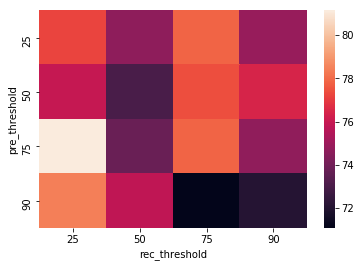

With instances sorted as False
With Early Stop set as False
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
8,False,False,shape,75,25,78.100000,87.083333,74.750000,84.875000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
7,False,False,shape,50,90,77.736905,84.925000,75.916667,84.083333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
14,False,False,shape,90,75,77.523810,83.166667,77.250000,81.450000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
12,False,False,shape,90,25,77.440476,84.666667,75.000000,83.333333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
6,False,False,shape,50,75,76.300000,84.250000,74.083333,83.516667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
2,False,False,shape,25,75,75.978571,83.708333,72.916667,84.116667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
13,False,False,shape,90,50,75.850000,79.666667,77.166667,83.733333,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
4,False,False,shape,50,25,75.604762,83.791667,73.500000,84.341667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
3,False,False,shape,25,90,75.600000,83.666667,72.916667,82.300000,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326
0,False,False,shape,25,25,75.028571,81.458333,74.000000,80.116667,89.057433,13.37965,89.197833,4.42107,0.248781,14.658326


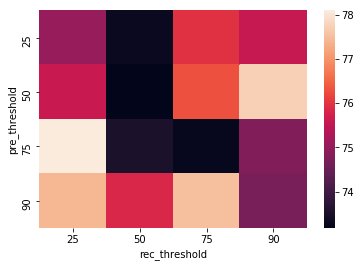

With instances sorted as True
With Early Stop set as True
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
12,True,True,object,90,25,73.786830,82.906250,70.651042,81.908854,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
1,True,True,object,25,50,73.304315,82.317708,70.364583,80.945312,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
7,True,True,object,50,90,73.029018,82.604167,69.843750,80.283854,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
9,True,True,object,75,50,72.956473,80.731771,70.807292,81.414062,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
14,True,True,object,90,75,72.715030,81.809896,69.843750,80.903646,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
13,True,True,object,90,50,72.500372,81.500000,69.375000,81.122396,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
4,True,True,object,50,25,72.442336,82.450521,68.854167,80.200521,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
5,True,True,object,50,50,72.412202,80.911458,69.635417,82.059896,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
10,True,True,object,75,75,72.375744,81.705729,68.541667,80.966146,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
8,True,True,object,75,25,72.176339,79.921875,70.572917,82.052083,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512


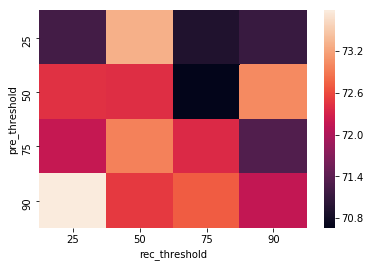

With instances sorted as True
With Early Stop set as False
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
7,True,False,object,50,90,73.861607,83.255208,70.703125,81.835938,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
13,True,False,object,90,50,73.539435,82.278646,70.807292,81.492188,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
0,True,False,object,25,25,73.391369,82.669271,70.338542,81.023438,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
4,True,False,object,50,25,73.287202,80.130208,71.770833,83.252604,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
9,True,False,object,75,50,73.180804,82.473958,70.000000,81.552083,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
14,True,False,object,90,75,73.132068,82.320312,70.000000,82.127604,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
12,True,False,object,90,25,72.590030,81.523438,69.817708,81.807292,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
2,True,False,object,25,75,72.197545,82.203125,68.828125,80.875000,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
8,True,False,object,75,25,72.184152,81.005208,69.401042,81.914062,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
1,True,False,object,25,50,72.157738,80.859375,69.088542,81.471354,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512


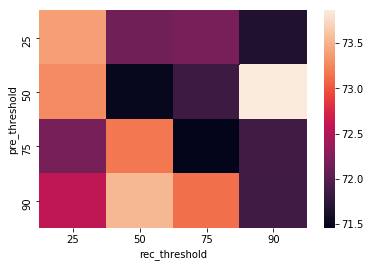

With instances sorted as False
With Early Stop set as True
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
7,False,True,object,50,90,73.238839,82.557292,70.338542,81.203125,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
12,False,True,object,90,25,73.121280,81.393229,70.677083,82.520833,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
5,False,True,object,50,50,73.075149,82.161458,69.817708,81.989583,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
11,False,True,object,75,90,72.913690,80.708333,70.937500,80.893229,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
14,False,True,object,90,75,72.366071,81.380208,69.635417,81.057292,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
9,False,True,object,75,50,72.295015,81.278646,69.557292,80.445312,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
4,False,True,object,50,25,72.293155,80.364583,69.765625,81.648438,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
8,False,True,object,75,25,72.177083,81.380208,69.375000,79.690104,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
1,False,True,object,25,50,72.078869,80.859375,69.192708,81.947917,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
6,False,True,object,50,75,72.061756,81.458333,68.645833,80.351562,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512


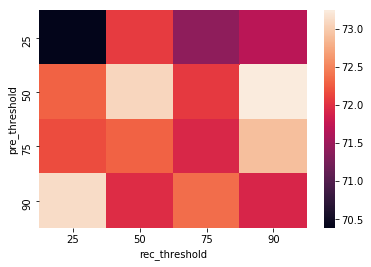

With instances sorted as False
With Early Stop set as False
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
1,False,False,object,25,50,73.301339,80.286458,71.380208,82.596354,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
2,False,False,object,25,75,73.133929,81.380208,70.182292,81.510417,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
12,False,False,object,90,25,72.924107,81.705729,70.442708,82.372396,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
9,False,False,object,75,50,72.818452,83.789062,69.036458,80.979167,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
11,False,False,object,75,90,72.664062,81.148438,70.416667,81.380208,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
3,False,False,object,25,90,72.542039,80.940104,69.895833,80.867188,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
7,False,False,object,50,90,72.485491,80.588542,69.609375,81.492188,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
13,False,False,object,90,50,72.307292,81.406250,69.270833,80.893229,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
5,False,False,object,50,50,72.124256,81.770833,68.776042,80.572917,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512
15,False,False,object,90,90,71.928199,80.393229,69.010417,80.841146,88.956653,11.933365,89.025925,4.031765,0.360394,14.876512


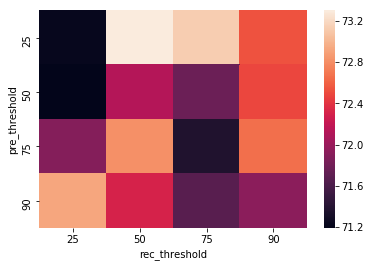

In [10]:
feature_types=["rgb","shape","object"]
early_stops=["True","False"]
instance_sorts=["True","False"]
All_Results=pd.DataFrame(Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().reset_index())
All_Results.to_csv("/Users/adithyabandi/Results.csv")
display()
for feature_type in feature_types:
    for instance_sort in instance_sorts:
        for early_stop in early_stops:
            print("With instances sorted as",instance_sort)
            print("With Early Stop set as",early_stop)
            print(feature_type,"results:")
            display_results(Results,feature_type,early_stop,instance_sort)